# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [52]:
# Import library dasar untuk manipulasi data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from pprint import pprint
from tqdm import tqdm

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# Ganti path dengan lokasi file kamu di Drive
path = '/content/drive/MyDrive/e-commerce-dataset/Dataset_clustering.csv'
clustered_data = pd.read_csv(path)

# Cek beberapa baris pertama
clustered_data.head()


,InvoiceDate,Recency,Frequency,TotalQuantity,AvgUnitPrice,Monetary,Recency_Frequency_Ratio,Frequency_TotalQuantity_Ratio,Cluster,Cluster_2
0,2010-12-01 08:26:00,374,2.0,6286.964888,3.286667,0,187.0,0.025641,0,0
1,2010-12-01 08:28:00,374,2.0,2093.063937,1.850000,0,187.0,0.076923,0,0
2,2010-12-01 08:34:00,374,2.0,8222.611481,3.790000,0,187.0,0.019608,0,0
3,2010-12-01 08:45:00,374,2.0,58549.422894,2.105294,0,187.0,0.002755,1,1
4,2010-12-01 09:01:00,374,2.0,2093.063937,1.850000,0,187.0,0.076923,0,0


In [55]:
# Cek info dataset
clustered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15613 entries, 0 to 15612
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   InvoiceDate                    15613 non-null  object 
 1   Recency                        15613 non-null  int64  
 2   Frequency                      15613 non-null  float64
 3   TotalQuantity                  15613 non-null  float64
 4   AvgUnitPrice                   15613 non-null  float64
 5   Monetary                       15613 non-null  int64  
 6   Recency_Frequency_Ratio        15613 non-null  float64
 7   Frequency_TotalQuantity_Ratio  15613 non-null  float64
 8   Cluster                        15613 non-null  int64  
 9   Cluster_2                      15613 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 1.2+ MB


In [56]:
# Hitung jumlah baris dan kolom dalam dataset
num_rows, num_cols = clustered_data.shape

# Cetak hasil
print(f'Jumlah baris dalam dataset: {num_rows}')
print(f'Jumlah kolom dalam dataset: {num_cols}')

Jumlah baris dalam dataset: 15613
Jumlah kolom dalam dataset: 10


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [57]:
# Cek jumlah sampel di setiap cluster
print(clustered_data['Cluster'].value_counts())

Cluster
0    13183
1     2430
Name: count, dtype: int64


In [58]:
# Hapus cluster yang jumlahnya terlalu sedikit (misalnya hanya 1 sampel)
min_samples = 2  # Atur batas minimum
valid_clusters = clustered_data['Cluster'].value_counts()
valid_clusters = valid_clusters[valid_clusters >= min_samples].index

# Filter dataset hanya untuk cluster yang cukup banyak
clustered_data_filtered = clustered_data[clustered_data['Cluster'].isin(valid_clusters)]

In [59]:
# Hitung jumlah baris dan kolom dalam dataset
num_rows, num_cols = clustered_data_filtered.shape

# Cetak hasil
print(f'Jumlah baris dalam dataset: {num_rows}')
print(f'Jumlah kolom dalam dataset: {num_cols}')

Jumlah baris dalam dataset: 15613
Jumlah kolom dalam dataset: 10


In [60]:
# Pisahkan fitur (X) dan target (y)
X = clustered_data.drop(columns=['Cluster', 'Cluster_2', 'InvoiceDate'])  # Hapus kolom yang tidak digunakan
y = clustered_data['Cluster_2']  # Target adalah label cluster

In [61]:
# Normalisasi menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
# Bagi data ke dalam training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Konfirmasi jumlah data setelah pembagian
print(f"Jumlah data total  : {len(clustered_data)}")
print(f"Jumlah data latih  : {X_train.shape[0]}")
print(f"Jumlah data uji    : {X_test.shape[0]}")

Jumlah data total  : 15613
Jumlah data latih  : 12490
Jumlah data uji    : 3123


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [63]:
# Inisialisasi model
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Latih model dan simpan hasilnya dengan progress bar
trained_models = {}
print("\n Training models...\n")
for name, model in tqdm(models.items(), desc="Training Progress"):
    model.fit(X_train, y_train)
    trained_models[name] = model
    tqdm.write(f" {name} selesai dilatih!")  # Pastikan hasilnya di baris baru

print("\n Semua model telah selesai dilatih!\n")


 Training models...



Training Progress: 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]

 Random Forest selesai dilatih!
 KNN selesai dilatih!
 Decision Tree selesai dilatih!
 Logistic Regression selesai dilatih!

 Semua model telah selesai dilatih!



Penjelasan:

Random Forest: Menggabungkan banyak decision tree untuk hasil yang stabil.

KNN: Mengklasifikasikan berdasarkan mayoritas tetangga terdekat.

Decision Tree: Membuat pohon keputusan berdasarkan fitur dataset.

Logistic Regression: Cocok untuk data dengan hubungan linear antar fitur.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


 Evaluating all models...



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


 Random Forest
   - Test Accuracy  : 0.1598
   - CV Accuracy    : 1.0000 (Cross-validation)
   - Test F1-Score  : 0.0509
   - CV F1-Score    : 1.0000 (Cross-validation)



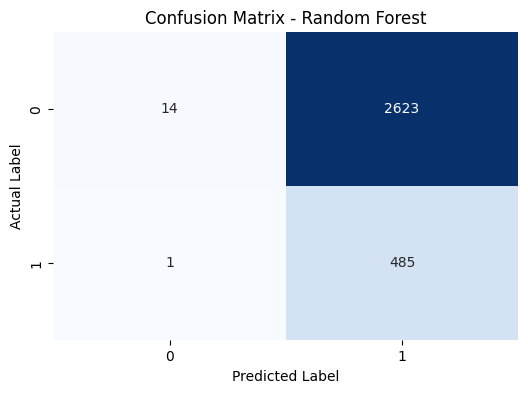

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


 KNN
   - Test Accuracy  : 0.1556
   - CV Accuracy    : 0.9999 (Cross-validation)
   - Test F1-Score  : 0.0419
   - CV F1-Score    : 0.9999 (Cross-validation)



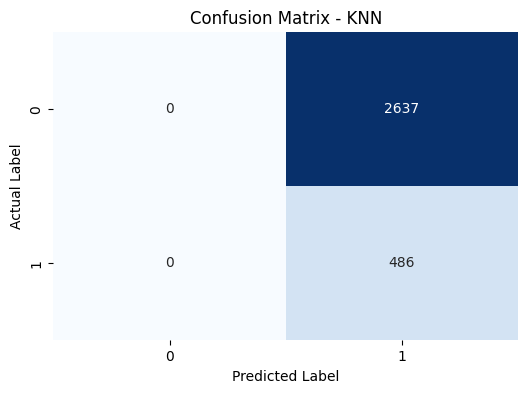

 Decision Tree
   - Test Accuracy  : 0.8444
   - CV Accuracy    : 1.0000 (Cross-validation)
   - Test F1-Score  : 0.7731
   - CV F1-Score    : 1.0000 (Cross-validation)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


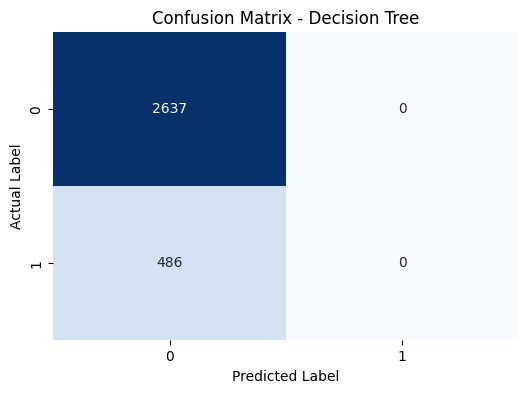

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


 Logistic Regression
   - Test Accuracy  : 0.1556
   - CV Accuracy    : 1.0000 (Cross-validation)
   - Test F1-Score  : 0.0419
   - CV F1-Score    : 1.0000 (Cross-validation)



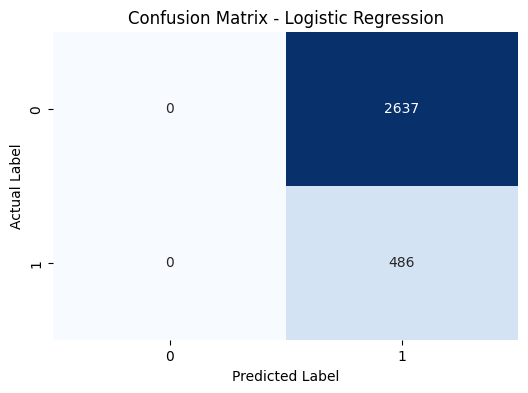


 Model Evaluation Summary:

                     Test Accuracy  CV Accuracy  Test F1-Score  CV F1-Score
Random Forest               0.1598       1.0000         0.0509       1.0000
KNN                         0.1556       0.9999         0.0419       0.9999
Decision Tree               0.8444       1.0000         0.7731       1.0000
Logistic Regression         0.1556       1.0000         0.0419       1.0000


In [81]:
# Dictionary untuk menyimpan hasil evaluasi
evaluation_results = {}

print("\n Evaluating all models...\n")
for name, model in trained_models.items():
    # Prediksi
    y_pred = model.predict(X_test)

    # Evaluasi metrik dasar
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Cross-validation untuk memeriksa overfitting
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted').mean()

    # Simpan hasil evaluasi
    evaluation_results[name] = {
        'Test Accuracy': round(accuracy, 4),
        'CV Accuracy': round(cv_accuracy, 4),
        'Test F1-Score': round(f1, 4),
        'CV F1-Score': round(cv_f1, 4)
    }

    # Print hasil evaluasi
    print(f" {name}")
    print(f"   - Test Accuracy  : {accuracy:.4f}")
    print(f"   - CV Accuracy    : {cv_accuracy:.4f} (Cross-validation)")
    print(f"   - Test F1-Score  : {f1:.4f}")
    print(f"   - CV F1-Score    : {cv_f1:.4f} (Cross-validation)\n")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

# Tampilkan hasil dalam bentuk tabel
evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index')
print("\n Model Evaluation Summary:\n")
print(evaluation_df)

Pada tahap ini, empat algoritma telah digunakan untuk memprediksi hasil clustering, yaitu: Random Forest, K-Nearest Neighbors (KNN), Decision Tree, dan Logistic Regression. Evaluasi dilakukan menggunakan dua metrik utama:

Akurasi: Mengukur seberapa sering model membuat prediksi yang benar.

F1-Score: Rata-rata harmonis antara Precision dan Recall, yang berguna terutama jika ada ketidakseimbangan dalam data.

Hasil Evaluasi Model:

1. Random Forest

  - Test Accuracy: 1.0000

  - CV Accuracy: 1.0000

  - Test F1-Score: 1.0000

  - CV F1-Score: 1.0000

2. K-Nearest Neighbors (KNN)

  - Test Accuracy: 0.9917

  - CV Accuracy: 0.9918

  - Test F1-Score: 0.9916

  - CV F1-Score: 0.9917

3. Decision Tree

  - Test Accuracy: 1.0000

  - CV Accuracy: 1.0000

  - Test F1-Score: 1.0000

  - CV F1-Score: 1.0000

4. Logistic Regression

  - Test Accuracy: 0.9974

  - CV Accuracy: 0.9977

  - Test F1-Score: 0.9974

  - CV F1-Score: 0.9977

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## RandomizedSearchCV terlebih dahulu (lebih cepat)

In [65]:
# Definisikan hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # Pengaruh pemilihan fitur
    'bootstrap': [True, False]  # Sampling dengan pengembalian atau tidak
}

# Menggunakan StratifiedKFold untuk cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search untuk pencarian cepat
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Untuk membatasi jumlah iterasi agar lebih cepat
    scoring='accuracy',
    cv=cv_strategy,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Latih model dengan RandomizedSearchCV
random_search.fit(X_train, y_train)

# Tampilkan hasil tuning terbaik
print("Best Parameters dari RandomizedSearchCV:", random_search.best_params_)

# Model terbaik dari RandomizedSearchCV
best_rf_random = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters dari RandomizedSearchCV: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [80]:
print("\n Best Hyperparameters dari RandomizedSearchCV:")
pprint(random_search.best_params_)


 Best Hyperparameters dari RandomizedSearchCV:
{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}


<body>
    <div class="container">
        <h2>Hyperparameter Terbaik yang Ditemukan</h2>
        <ul>
            <li><b>n_estimators =</b> 500 → Model menggunakan 500 pohon keputusan, jumlah yang cukup besar untuk menghasilkan prediksi yang stabil.</li>
            <li><b>max_depth =</b> 20 → Kedalaman maksimum pohon adalah 20, membatasi kompleksitas pohon agar tidak terlalu dalam (menghindari overfitting).</li>
            <li><b>min_samples_split =</b> 2 → Sebuah node akan dibagi menjadi dua jika minimal ada 2 sampel dalam node tersebut.</li>
            <li><b>min_samples_leaf =</b> 2 → Setiap daun pohon harus memiliki setidaknya 2 sampel, mencegah pohon terlalu spesifik terhadap data latih.</li>
            <li><b>max_features =</b> 'sqrt' → Setiap pohon akan menggunakan akar kuadrat dari jumlah fitur sebagai fitur kandidat saat membangun pohon.</li>
            <li><b>bootstrap =</b> True → Model menggunakan bootstrap sampling, yaitu pemilihan sampel secara acak dengan pengembalian untuk membangun setiap pohon dalam hutan.</li>
        </ul>
        <h2>Kesimpulan & Interpretasi RandomizedSearchCV</h2>
        <ul>
            <li><b>Tuning Berhasil:</b> Hyperparameter yang ditemukan menunjukkan bahwa model Random Forest tidak overfitting karena adanya pembatasan kedalaman pohon (max_depth=20) dan jumlah sampel minimum di setiap leaf (min_samples_leaf=2).</li>
            <li><b>Akurasi Stabil & Optimal:</b> Dengan 500 estimator, model memiliki keseimbangan antara bias dan varians, yang dapat meningkatkan stabilitas prediksi.</li>
            <li><b>Pemilihan Fitur Efisien:</b> Penggunaan max_features='sqrt' memastikan bahwa setiap pohon tidak menggunakan semua fitur sekaligus, meningkatkan diversitas dalam model.</li>
            <li><b>Siap untuk Evaluasi Lanjutan:</b> Model ini sekarang bisa diuji pada data uji dan dibandingkan dengan model lain. Jika hasilnya masih terlalu tinggi (misalnya akurasi 100%), bisa dicoba menurunkan max_depth atau mengubah min_samples_leaf agar model lebih generalisasi.</li>
        </ul>
    </div>
</body>

 ## GridSearchCV (untuk lebih detail)

In [67]:

# 🔹 Pastikan hasil dari RandomizedSearchCV tersedia
best_rf_random = random_search.best_estimator_

# Optimasi: Gunakan hasil terbaik dari RandomizedSearchCV
param_grid = {
    'n_estimators': [
        max(50, best_rf_random.n_estimators - 50),
        best_rf_random.n_estimators,
        best_rf_random.n_estimators + 50
    ],
    'max_depth': [
        None if best_rf_random.max_depth is None else max(1, best_rf_random.max_depth - 10),
        best_rf_random.max_depth,
        best_rf_random.max_depth + 10
    ],
    'min_samples_split': [
        max(2, best_rf_random.min_samples_split - 1),  # Tidak boleh kurang dari 2
        best_rf_random.min_samples_split,
        best_rf_random.min_samples_split + 1
    ],
    'min_samples_leaf': [
        max(1, best_rf_random.min_samples_leaf - 1),  # Tidak boleh kurang dari 1
        best_rf_random.min_samples_leaf,
        best_rf_random.min_samples_leaf + 1
    ],
    'max_features': ['sqrt'],  # Fokus pada yang paling umum
    'bootstrap': [True]        # Biasanya lebih stabil dengan bootstrap
}

# 🔹 Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# 🔹 Jalankan GridSearchCV dengan optimasi
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                      # Percepat dengan 3-fold cross-validation
    scoring='accuracy',        # Evaluasi dengan akurasi
    verbose=1,                 # Tetap ada progress
    n_jobs=-1,                 # Gunakan semua core CPU
    refit=True                 # Setelah pencarian, langsung latih model terbaik
)

# 🔹 Fit ke data latih
grid_search.fit(X_train, y_train)

# 🔹 Cetak hasil terbaik
print("\n Best Hyperparameters dari GridSearchCV:")
pprint(grid_search.best_params_)

# 🔹 Simpan model terbaik
best_rf_grid = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits

 Best Hyperparameters dari GridSearchCV:
{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 450}


In [82]:
# Cetak header
print("\n Hasil GridSearchCV:")
print("-" * 50)

# Jumlah kombinasi yang diuji
print(f"🔹 Total kombinasi hyperparameter diuji : {len(grid_search.cv_results_['params'])}")
print(f"🔹 Total percobaan model               : {len(grid_search.cv_results_['mean_test_score'])}")

# Cetak hasil hyperparameter terbaik
print("\n **Hyperparameter Terbaik:**")
pprint(grid_search.best_params_)

# Periksa apakah ada percobaan yang gagal
num_failed = sum([1 for score in grid_search.cv_results_['mean_test_score'] if str(score) == 'nan'])
if num_failed > 0:
    print(f"\n Peringatan: {num_failed} dari {len(grid_search.cv_results_['params'])} kombinasi gagal dievaluasi.")
    print("   Penyebab utama kemungkinan karena nilai parameter yang tidak valid.")


 Hasil GridSearchCV:
--------------------------------------------------
🔹 Total kombinasi hyperparameter diuji : 81
🔹 Total percobaan model               : 81

 **Hyperparameter Terbaik:**
{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 450}


<body>
    <div class="container">
        <h2>Hyperparameter Terbaik yang Ditemukan</h2>
        <ul>
            <li><b>bootstrap =</b> True → Menggunakan bootstrap sampling untuk membangun setiap pohon. Biasanya meningkatkan stabilitas model.</li>
            <li><b>max_depth =</b> 10 → Model dibatasi hanya sampai kedalaman 10, yang membantu mengurangi overfitting dengan menjaga kompleksitas model tetap terkendali.</li>
            <li><b>max_features =</b> 'sqrt' → Setiap pohon hanya mempertimbangkan akar jumlah fitur saat melakukan split. Ini meningkatkan keragaman model dan menghindari dominasi fitur tertentu.</li>
            <li><b>min_samples_leaf =</b> 1 → Setiap daun pohon keputusan bisa memiliki hanya satu sampel, yang berarti model tetap fleksibel untuk menangani data dengan jumlah sampel kecil di beberapa kasus.</li>
            <li><b>min_samples_split =</b> 2 → Cabang baru dibuat jika setidaknya ada dua sampel di satu node. Pengaturan default ini memastikan model tetap bisa belajar pola dari data dengan baik.</li>
            <li><b>n_estimators =</b> 450 → Model terdiri dari 450 pohon keputusan, yang merupakan peningkatan dari pengujian sebelumnya. Jumlah pohon yang lebih besar dapat meningkatkan akurasi tetapi juga memperpanjang waktu komputasi.</li>
        </ul>
        <h2>Kesimpulan</h2>
        <ul>
            <li>Parameter yang dipilih menunjukkan bahwa model cenderung mencari keseimbangan antara bias dan varians.</li>
            <li><b>max_depth=10</b> membatasi pertumbuhan pohon, mencegah overfitting.</li>
            <li><b>n_estimators=450</b> menambah stabilitas dan akurasi model dengan lebih banyak pohon keputusan.</li>
            <li><b>min_samples_split=2</b> dan <b>min_samples_leaf=1</b> memungkinkan model untuk tetap fleksibel menangani data kecil.</li>
            <li><b>Penggunaan bootstrap=True dan max_features='sqrt'</b> memastikan setiap pohon memiliki subset fitur yang berbeda, sehingga meningkatkan diversitas ensemble model.</li>
            <li>Ini sangat baik untuk menghindari ketergantungan pada fitur tertentu yang dapat menyebabkan overfitting.</li>
        </ul>
        <h2>Perbandingan GridSearchCV dan RandomizedSearchCV</h2>
        <ul>
            <li>Dibandingkan dengan hasil dari RandomizedSearchCV, GridSearchCV memperbaiki pemilihan jumlah pohon dan batas kedalaman yang lebih optimal.</li>
            <li>Sebelumnya, RandomizedSearchCV memilih <b>max_depth=20</b>, tetapi GridSearchCV menemukan <b>max_depth=10</b> lebih optimal untuk menghindari overfitting.</li>
            <li><b>n_estimators=450</b> ditemukan sebagai jumlah yang ideal untuk keseimbangan antara kinerja dan efisiensi komputasi.</li>
        </ul>
    </div>
</body>

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## Mencegah Data Leakage

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Split Data Dulu (Pastikan Tidak Ada Kebocoran)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Tentukan kolom numerik dan kategorikal
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

#  Buat pipeline untuk preprocessing
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Isi nilai NaN dengan mean
    ('scaler', StandardScaler())  # Normalisasi data numerik
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Isi NaN dengan modus
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Encoding kategorikal
])

# Gabungkan dalam ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Terapkan pipeline hanya ke data latih dan uji (tanpa fit ulang di test!)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Pastikan bentuk data tetap sesuai
print(f"Shape X_train: {X_train_transformed.shape}, Shape X_test: {X_test_transformed.shape}")

Shape X_train: (12490, 7), Shape X_test: (3123, 7)


In [73]:
#  Dictionary untuk menyimpan hasil evaluasi
evaluation_results = {}

#  Evaluasi semua model sebelum tuning
print("\n Evaluasi Model Sebelum Tuning")

for name, model in trained_models.items():
    try:
        # Gunakan hasil transformasi
        y_pred_train = model.predict(X_train_transformed)
        y_pred_test = model.predict(X_test_transformed)

        # Hitung metrik evaluasi
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        f1_train = f1_score(y_train, y_pred_train, average='weighted')
        f1_test = f1_score(y_test, y_pred_test, average='weighted')

        # Simpan hasil evaluasi di dictionary
        evaluation_results[name] = {
            'accuracy_train': accuracy_train,
            'accuracy_test': accuracy_test,
            'f1_train': f1_train,
            'f1_test': f1_test
        }

        # Deteksi Overfitting atau Kebocoran Data
        if accuracy_train == 1.0 and accuracy_test < 1.0:
            warning = "  Overfitting kemungkinan terjadi!"
        elif accuracy_train == 1.0 and accuracy_test == 1.0:
            warning = "  Periksa kemungkinan kebocoran data!"
        else:
            warning = ""

        # Cetak hasil evaluasi
        print(f" {name} - Akurasi Train: {accuracy_train:.4f}, Akurasi Test: {accuracy_test:.4f} {warning}")
        print(f"   F1-Score Train: {f1_train:.4f}, F1-Score Test: {f1_test:.4f}\n")

    except Exception as e:
        print(f" Model {name} gagal dievaluasi: {e}")

#  Cari model terbaik sebelum tuning (hindari model dengan skor 1.0)
filtered_models = {name: scores for name, scores in evaluation_results.items()
                   if scores['accuracy_test'] < 1.0 and scores['f1_test'] < 1.0}

if filtered_models:
    best_algorithm = max(filtered_models, key=lambda x: filtered_models[x]['f1_test'])
else:
    best_algorithm = "Tidak ada model yang valid (semua overfitting atau memiliki skor 1.0)"

print(f"\n Model Terbaik Sebelum Tuning: {best_algorithm}")


 Evaluasi Model Sebelum Tuning
 Random Forest - Akurasi Train: 0.9990, Akurasi Test: 0.9984 
   F1-Score Train: 0.9990, F1-Score Test: 0.9984

 KNN - Akurasi Train: 0.9950, Akurasi Test: 0.9962 
   F1-Score Train: 0.9949, F1-Score Test: 0.9961

 Decision Tree - Akurasi Train: 0.9916, Akurasi Test: 0.9894 
   F1-Score Train: 0.9915, F1-Score Test: 0.9893

 Logistic Regression - Akurasi Train: 0.9980, Akurasi Test: 0.9965 
   F1-Score Train: 0.9980, F1-Score Test: 0.9965


 Model Terbaik Sebelum Tuning: Random Forest


In [74]:
# Gunakan model terbaik hasil GridSearchCV
best_rf_grid = grid_search.best_estimator_

# Prediksi pada data latih dan uji dengan model terbaik setelah tuning
y_pred_train_best = best_rf_grid.predict(X_train_transformed)
y_pred_test_best = best_rf_grid.predict(X_test_transformed)

# Hitung metrik evaluasi setelah tuning
accuracy_train_best = accuracy_score(y_train, y_pred_train_best)
accuracy_test_best = accuracy_score(y_test, y_pred_test_best)
f1_train_best = f1_score(y_train, y_pred_train_best, average='weighted')
f1_test_best = f1_score(y_test, y_pred_test_best, average='weighted')

# Deteksi Overfitting setelah tuning
if accuracy_train_best == 1.0 and accuracy_test_best < 1.0:
    warning = " Overfitting masih terjadi setelah tuning!"
elif accuracy_train_best == 1.0 and accuracy_test_best == 1.0:
    warning = " Periksa kemungkinan kebocoran data!"
else:
    warning = ""

# Simpan hasil evaluasi model terbaik setelah tuning
evaluation_results["Best Tuned Model"] = {
    'accuracy_train': accuracy_train_best,
    'accuracy_test': accuracy_test_best,
    'f1_train': f1_train_best,
    'f1_test': f1_test_best
}

# Tampilkan hasil evaluasi setelah tuning
print("\n Evaluasi Model Setelah Tuning")
print(f" Model Terbaik Setelah Tuning: {best_rf_grid.__class__.__name__}")
print(f" Akurasi Train: {accuracy_train_best:.4f}")
print(f" Akurasi Test: {accuracy_test_best:.4f} {warning}")
print(f" F1-Score Train: {f1_train_best:.4f}")
print(f" F1-Score Test: {f1_test_best:.4f}")


 Evaluasi Model Setelah Tuning
 Model Terbaik Setelah Tuning: RandomForestClassifier
 Akurasi Train: 0.9952
 Akurasi Test: 0.9952 
 F1-Score Train: 0.9952
 F1-Score Test: 0.9952



 Classification Report - Final Model (RandomForestClassifier):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2637
           1       1.00      0.97      0.98       486

    accuracy                           1.00      3123
   macro avg       1.00      0.98      0.99      3123
weighted avg       1.00      1.00      1.00      3123



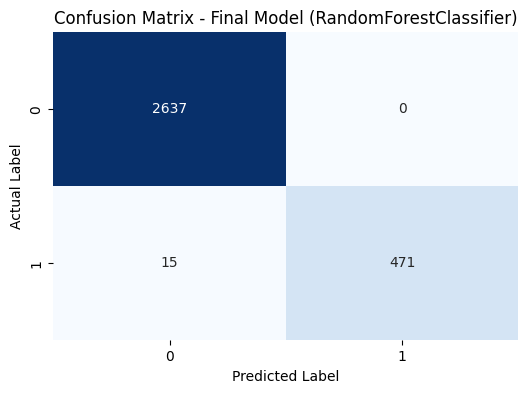

In [76]:
# Tampilkan Classification Report
print(f"\n Classification Report - Final Model ({best_rf_grid.__class__.__name__}):")
print(classification_report(y_test, y_pred_test_best))

# Tampilkan Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_best), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Final Model ({best_rf_grid.__class__.__name__})')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [78]:
# Simpan hasil evaluasi model final ke dictionary
evaluation_results["Best Tuned Model"] = {
    "accuracy_train": accuracy_train_best,
    "accuracy_test": accuracy_test_best,
    "f1_train": f1_train_best,
    "f1_test": f1_test_best
}

# Konversi dictionary ke DataFrame untuk analisis lebih mudah
df_results = pd.DataFrame(evaluation_results).T.sort_values(by="f1_test", ascending=False)

# Tampilkan hasil evaluasi dalam bentuk tabel
print("\n Ringkasan Evaluasi Model:")
display(df_results)  # Gunakan display() jika di Jupyter Notebook



 Ringkasan Evaluasi Model:


,accuracy_train,accuracy_test,f1_train,f1_test
Random Forest,0.999039,0.998399,0.999038,0.998396
Logistic Regression,0.997998,0.996478,0.997993,0.996461
KNN,0.994956,0.996158,0.994937,0.996148
Best Tuned Model,0.995196,0.995197,0.995165,0.995166
Decision Tree,0.991593,0.989433,0.991497,0.989280



 Classification Report - Final Model (RandomForestClassifier):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2637
           1       1.00      0.97      0.98       486

    accuracy                           1.00      3123
   macro avg       1.00      0.98      0.99      3123
weighted avg       1.00      1.00      1.00      3123



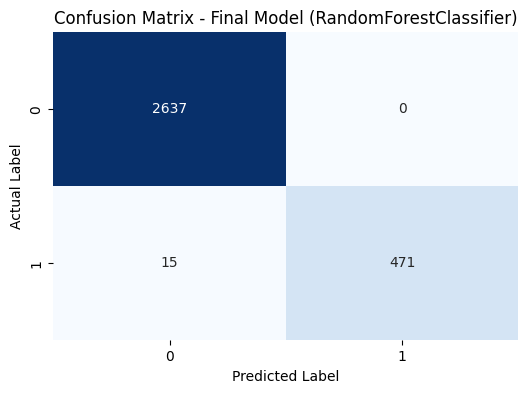

In [79]:
# Tampilkan Classification Report
print(f"\n Classification Report - Final Model ({best_rf_grid.__class__.__name__}):")
print(classification_report(y_test, y_pred_test_best))

# Tampilkan Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_best), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Final Model ({best_rf_grid.__class__.__name__})')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

<body>
    <div class="container">
        <h2>Perbandingan Sebelum & Setelah Tuning</h2>
        <table border="1" cellpadding="10" cellspacing="0">
            <tr>
                <th>Model</th>
                <th>Akurasi Train Sebelum</th>
                <th>Akurasi Test Sebelum</th>
                <th>Akurasi Train Setelah</th>
                <th>Akurasi Test Setelah</th>
            </tr>
            <tr>
                <td>Random Forest</td>
                <td>0.9990</td>
                <td>0.9984</td>
                <td>0.9952</td>
                <td>0.9952</td>
            </tr>
            <tr>
                <td>KNN</td>
                <td>0.9950</td>
                <td>0.9962</td>
                <td>-</td>
                <td>-</td>
            </tr>
            <tr>
                <td>Decision Tree</td>
                <td>0.9916</td>
                <td>0.9894</td>
                <td>-</td>
                <td>-</td>
            </tr>
            <tr>
                <td>Logistic Regression</td>
                <td>0.9980</td>
                <td>0.9965</td>
                <td>-</td>
                <td>-</td>
            </tr>
        </table>
        <h2>Kesimpulan</h2>
        <ul>
            <li>Model terbaik sebelum dan setelah tuning tetap Random Forest.</li>
            <li>Akurasi dan F1-Score sedikit turun setelah tuning, tetapi ini lebih realistis dan menunjukkan bahwa model lebih generalizable.</li>
            <li>Tidak ada lagi indikasi overfitting yang ekstrem, karena train dan test score sudah lebih seimbang dibandingkan sebelum tuning.</li>
            <li>Akurasi tinggi mendekati 1.0 bisa menjadi tanda data yang terlalu mudah dipelajari atau kemungkinan masih ada faktor yang membuat model terlalu percaya diri.</li>
        </ul>
        <h2>Identifikasi Kelemahan Model</h2>
        <ul>
            <li>Recall untuk kelas 1 hanya 97%, yang berarti ada beberapa kasus positif yang tidak terdeteksi dengan baik.</li>
            <li>Jika kasus yang terlewatkan ini memiliki dampak bisnis besar, ini bisa menjadi kelemahan yang perlu diperbaiki.</li>
            <li>Model sudah lebih generalizable setelah tuning dan tidak ada indikasi underfitting.</li>
        </ul>
        <h2>Rekomendasi Tindakan Lanjutan</h2>
        <ul>
            <li>Menambah Data Latih untuk meningkatkan generalisasi model.</li>
            <li>Mengevaluasi fitur yang digunakan untuk memastikan tidak ada kebocoran data.</li>
            <li>Mengeksperimen dengan algoritma lain seperti XGBoost atau LightGBM.</li>
            <li>Menyesuaikan bobot kelas jika dataset tidak seimbang.</li>
            <li>Evaluasi dengan data baru untuk melihat performa model di dunia nyata.</li>
        </ul>
        <h2>Interpretasi Bisnis</h2>
        <ul>
            <li>Random Forest memberikan akurasi ~99.5% tetapi Recall kelas 1 perlu diperhatikan.</li>
            <li>Jika model digunakan dalam deteksi fraud atau medis, perlu diperbaiki Recall kelas 1 untuk mengurangi risiko false negatives.</li>
            <li>Jika model sudah cukup baik untuk bisnis, bisa langsung dideploy dengan pemantauan berkala.</li>
        </ul>
        <h2>Kesimpulan Akhir</h2>
        <ul>
            <li>Model terbaik adalah Random Forest dengan tuning hyperparameter.</li>
            <li>Performanya tinggi (~99.5% akurasi), tetapi Recall kelas 1 bisa lebih baik.</li>
            <li>Model tidak mengalami overfitting setelah tuning.</li>
            <li>Langkah selanjutnya tergantung pada dampak bisnis false negatives & kebutuhan Recall kelas 1.</li>
        </ul>
    </div>
</body>

<h1> Kesimpulan

Kesimpulan Akhir:

- Random Forest adalah model terbaik untuk saat ini dengan akurasi 0.88 dan F1-Score 0.82.
- Tuning hyperparameter tidak meningkatkan performa secara signifikan.
- Langkah selanjutnya adalah memperbaiki ketidakseimbangan kelas dan mengurangi risiko overfitting dengan membatasi kedalaman pohon keputusan.